# Project Description 

Here is a short project description; This notebook is fictitious to illustrate common data analysis tasks. Intention here is to use this as a tempate for data classification work.

This **project1** will:

* load a sample dataset and explore the loaded data
* Prepares the Dataset by removing columns, filtering rows
* Show some descriptive stats on the data
* Show Inferential Statistics using Classification 
* provides results of the analysis 


### Description of the Dataset

> The dataset contains various columns extracted from device Census for specifically for OEM Models matching {**Surface Pro 4 **  ** Surface Book ** }

> The "Capable" Columns indicates whether that device is "Hello Capable" or not. 

> We know that all Surface pro 4 (include Surface Book) devices are hard ware ready and they become capable when suitable software drivers are installed 

> The task here is to detect if a device is "Hello capable or not"

> This problem is artificially made up for the purpose of creating this template and no animals are hurt during this production :)

In [1]:
%%time
%run "../common.ipynb"

fileName="data/analysis1.xlsx"  # Data is located in analysis1.xlsx
fileName="data/analysis1-small.xlsx"  # Data is located in analysis1.xlsx
dfOriginal = LoadDataSet(fileName, columns=None, checkForDateTime=False);

# Filename can be 
#     1. URL: fileName="https://raw.githubusercontent.com/pydata/pandas/master/pandas/tests/data/iris.csv"
#     2. csv, tsv or excel spread sheet (Database is not supported now)
#     3. It can be string with new lines

#analysis1.xlsx         - contains approx 1 million rows - therefore takes aout 2 minutes to load
#analysis1-small.xlsx   - contains approx 400 rows - I will use this first to test and switch to bigger file later 


#Explore the loaded data by uncommenting the following code 

print (dfOriginal.columns)
# -- Above will give:
# Index([u'ProcessedDateId', u'DeviceId', u'OEMModel', u'OSVersionFull', u'OSVersionToStr', u'FirstUpdatedDate',  
#        u'LastUpdatedDate', u'IngestTime', u'OSInstallDate',  u'FirstSeen', u'Capable_FirstSeen', u'AuthType', u'DBKLag',
#        u'DBKLagOSInstallDate', u'DBKLagFirstUpdatedDate', u'DBKLagFirstLastUpdatedDate', u'Capable'], dtype='object')
#
# 
display(dfOriginal)
# -- This will display raw data as is

Index(['ProcessedDateId', 'DeviceId', 'OEMModel', 'OSVersionFull', 'OSVersionToStr', 'FirstUpdatedDate', 'LastUpdatedDate', 'IngestTime', 'OSInstallDate', 'FirstSeen', 'Capable_FirstSeen', 'AuthType', 'DBKLag', 'DBKLagOSInstallDate', 'DBKLagFirstUpdatedDate', 'DBKLagFirstLastUpdatedDate', 'Capable'], dtype='object')


,ProcessedDateId,DeviceId,OEMModel,OSVersionFull,OSVersionToStr,FirstUpdatedDate,LastUpdatedDate,IngestTime,OSInstallDate,FirstSeen,Capable_FirstSeen,AuthType,DBKLag,DBKLagOSInstallDate,DBKLagFirstUpdatedDate,DBKLagFirstLastUpdatedDate,Capable
0,20150918,g:6755401211804065,Surface Book,10.0.10240.16498.amd64fre.th1.150819-1946,10240.16498.150819.1946,2015-09-18 18:31:54,2015-09-18 18:31:54,2015-09-18 18:31:54,2015-09-18,NaN,NaN,NaN,159.901,160.673,159.901,0.000,0
1,20150919,g:6755401217174945,Surface Pro 4,10.0.10240.16498.amd64fre.th1.150819-1946,10240.16498.150819.1946,2015-09-19 10:27:53,2015-09-19 10:27:53,2015-09-19 10:27:53,2015-09-19,NaN,NaN,NaN,59.000,159.673,159.237,0.000,0
2,20150919,g:6755401217199845,Surface Pro 4,10.0.10240.16498.amd64fre.th1.150819-1946,10240.16498.150819.1946,2015-09-19 10:06:31,2015-09-19 10:06:31,2015-09-19 10:06:31,2015-09-19,NaN,NaN,NaN,159.252,159.673,159.252,0.000,0
3,20150919,g:6755401217280897,Surface Pro 4,10.0.10240.16498.amd64fre.th1.150819-1946,10240.16498.150819.1946,2015-09-19 09:49:57,2015-09-19 09:49:57,2015-09-19 09:49:57,2015-09-19,NaN,NaN,NaN,57.000,159.673,159.264,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,20160225,g:6755401328746124,Surface Pro 4,10.0.10586.104.amd64fre.th2_release.160126-1819,10586.00104.160126.1819,2015-10-08 14:57:51,2016-02-25 14:39:57,2016-02-25 14:39:57,2016-01-22,2015-10-24 20:00:00,2015-10-24 20:00:00,0 Face,-123.778,-89.167,16.210,139.988,1
397,20160225,g:6755401328771825,Surface Pro 4,10.0.10586.104.amd64fre.th2_release.160126-1819,10586.00104.160126.1819,2015-10-08 14:58:54,2016-02-25 14:50:53,2016-02-25 14:50:53,2016-02-04,2015-10-24 17:00:00,2015-10-24 17:00:00,0 Face,-123.910,-102.292,16.084,139.994,1
398,20160210,g:6755401328842134,Surface Pro 4,10.0.10240.16644.amd64fre.th1.160104-1507,10240.16644.160104.1507,2015-10-08 15:58:46,2016-02-10 16:40:22,2016-02-10 16:40:22,2015-10-08,2015-10-25 17:00:00,2015-10-25 17:00:00,0 Face,-107.986,17.708,17.043,125.029,1
399,20160222,g:6755401329017372,Surface Pro 4,10.0.10586.104.amd64fre.th2_release.160126-1819,10586.00104.160126.1819,2015-10-08 15:59:44,2016-02-22 01:43:36,2016-02-22 01:43:36,2016-02-10,2015-10-24 19:00:00,2015-10-24 19:00:00,0 Face,-120.280,-108.208,16.125,136.405,1


CPU times: user 1.45 s, sys: 308 ms, total: 1.75 s
Wall time: 2.31 s


In [6]:
# Prepare dataset
#
# 1. Drop columns we don't need
# 2. Convert column datatypes as needed; to string, datetime, numbers as needed
# 3. Add Calculated Columns
# 4. Filter out rows and reindex the dataframe
# 5. Display the resulting dataframe
# 6. Show some descriptive statistics

#=====
#1. "ProcessedDateId" column is Intentionally misspelled to show it goes undetected if not careful

toDrop= [k.strip() for k in '''ProcessedDateId1, DeviceId, OSVersionFull,IngestTime,AuthType, FirstUpdatedDate, FirstSeen,DBKLagFirstUpdatedDate, DBKLagFirstLastUpdatedDate '''.split(",")]
dfL = dfOriginal.drop(toDrop, axis=1, errors="ignore")

#1a -> Set the Prediction column
#   -> Set class names if you know it or make it None
predictColumn = "Capable"
class_names = ["Not capable", "Capable"]

#2. Some wrong dates causing error here - so lets treat this as str
dfL[u'Capable_FirstSeen'] = dfL[u'Capable_FirstSeen'].astype(str)    # Treat this columns as string
dfL[u'ProcessedDateId']   = dfL[u'ProcessedDateId'].astype(str)      # Treat this columns as string (intentionally included)


#3. Calculated columns
dfL[u'DBKLag'] = dfL[u'DBKLag']/60                                   # lets divide this by 60 
dfL[u'DBKLag'] = dfL.DBKLag.apply(abs)                               # Convert to absolute value 
#
# Add a today's column 
# Convert to datetime - although it is already in datetime format
dfL['today'] = datetime.datetime.today()
dfL.LastUpdatedDate  = pd.to_datetime(dfL.LastUpdatedDate)
#
# calculate the hours difference between today and last updated Date
dfL['diff_last_to_today'] = (dfL.today - dfL.LastUpdatedDate) / np.timedelta64(1, 'h'); 

#4. Filter rows
n1 = dfL.shape[0]
dfL = dfL[dfL.DBKLag > 1]                                            # Lets take only those that have a value > 0 
#
# Here are other common filtering you may use:
# dfL = dfL[dfL['OEMModel'] == "Surface Pro 4"]
# dfL = dfL[dfL.OSVersionFull.str.contains("th1") | dfL.OSVersionFull.str.contains("th2")]

n2 = dfL.shape[0]
print ("Filtering: Number of rows Before {} and After {}".format(n1,n2));

#4a. You may reshuffle the rows if needed to make sure they are not in any particular order
dfL = dfL.sample(frac=1).reset_index(drop=True)

#4b. 
# Once you filter, it is a good idea to reindex such that 0th row matches to 0th row in the resulting dataframe
# To see what happens if you didn't to reindex, comment out the following code and notice index 1 and 3 are visibly missing 

dfL = dfL.reset_index(drop=True) 

#5.
displayDFs(dfL, showIcons=True, showStats=True, maxrows = 4) 

# You can see the entire dataframe by using the following
# HTML(dfL.to_html())


Filtering: Number of rows Before 400 and After 248


count,248,248,248,248,248,248,248.000,248.000,248.000,248,248.000
unique,75,2,15,247,74,51,-,-,-,1,-
top,20160225,Surface Pro 4,10240.16498.150819.1946,2016-02-25 12:47:03,2015-10-26 00:00:00,-,-,-,-,2016-05-21 16:40:32.584151,-
freq,60,199,112,2,67,153,-,-,-,248,-
first,-,-,-,2015-09-18 18:31:54,2015-09-18 00:00:00,-,-,-,-,2016-05-21 16:40:32.584151,-
last,-,-,-,2016-02-25 14:58:56,2016-02-23 00:00:00,-,-,-,-,2016-05-21 16:40:32.584151,-
mean,-,-,-,-,-,-,1.998,56.837,0.383,-,3962.946
std,-,-,-,-,-,-,0.285,101.325,0.487,-,1428.373
min,-,-,-,-,-,-,1.035,-120.375,0.000,-,2065.693
25%,-,-,-,-,-,-,1.978,-22.198,0.000,-,2082.099
50%,-,-,-,-,-,-,2.034,122.673,0.000,-,4912.444


In [7]:
# You can even view the Excel spread sheet if you wanted to:
# Excel2Html(fileName, length="300px")


## Descriptive Statistics

Dropping in prepareDF -  Index(['ProcessedDateId', 'Capable_FirstSeen'], dtype='object')


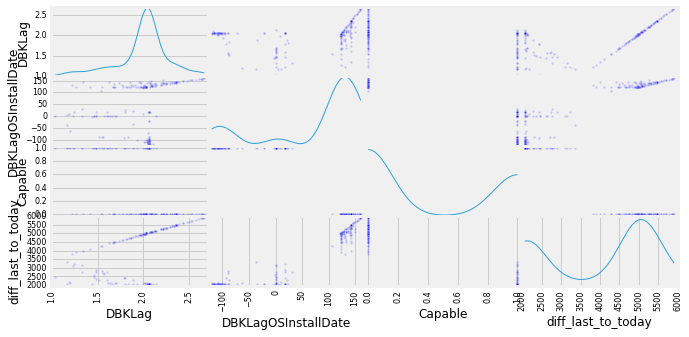

In [8]:
#6. Descriptive statistics 
# In above we see individual stats per column; here we see the interaction between columns

df =  prepareDF(dfL, makeCopy=True)
scatter_matrix(dfL, alpha=0.2, diagonal='kde', figsize=(10, 5)); # diagonal can be 'hist';

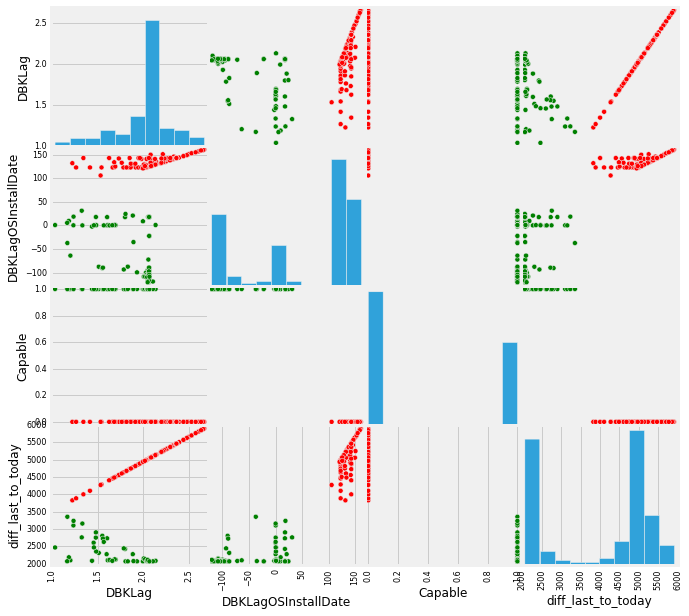

In [9]:
# or see the ditribution of target variable based opn colors and histograms

c="r,g,b,c,m,y,k,w".split(",")
scatter_matrix(dfL, alpha=1, figsize=(10,10), s=100, c=df[predictColumn].apply(lambda x:c[x]));

# 6a. Cross tab calculations


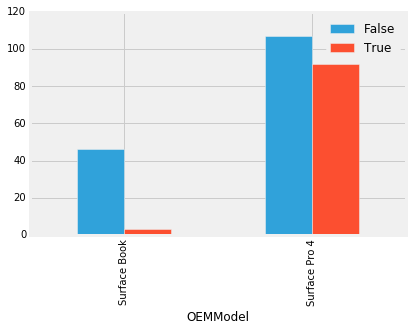

In [10]:
print ("# 6a. Cross tab calculations")
d=pd.crosstab(dfL.OEMModel, dfL[predictColumn].astype(bool))
d.plot(kind="bar")
HTML(d.to_html())

plt.legend(loc='upper right');

#6b lets see the distribution of DBKLag pivotting on [predictColumn] flag


''

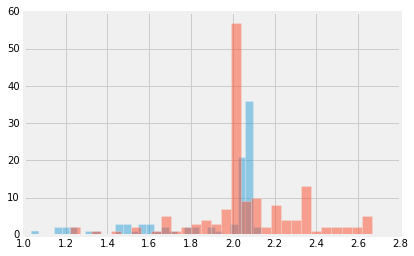

In [4]:
print ("#6b lets see the distribution of DBKLag pivotting on [predictColumn] flag")

dfs = [dfL[dfL[predictColumn] == k] for k in dfL[predictColumn].unique() ] 

interestingColumns=['DBKLag']
for d in dfs:
    for i in interestingColumns:
        d[i].hist(alpha=0.5, bins=30, label=d[predictColumn], grid=True)
;

#6b PCA and view scatter plot on 2D
Dropping in prepareDF -  Index(['ProcessedDateId', 'Capable_FirstSeen'], dtype='object')


,0,1,Capable,Capable_idx
0,4111392813.345,-565204496.273,0,0
1,4102053183.578,-571747554.795,0,0
2,-3093936064.941,5160407841.148,1,1
3,-3033161536.980,5233424767.525,1,1
...,...,...,...,...
244,-8841397017.479,-1762792040.369,1,1
245,4101153531.426,-571000690.252,0,0
246,-8840758505.893,-1762022428.098,1,1
247,4102669217.150,-572258967.603,0,0


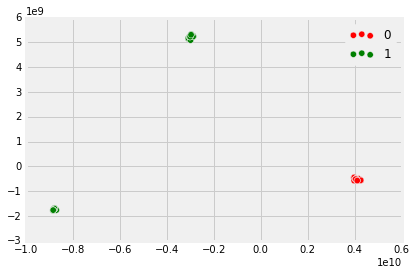

In [62]:
print ("#6b PCA and view scatter plot on 2D")

PCAPlot(dfL, predictColumn)

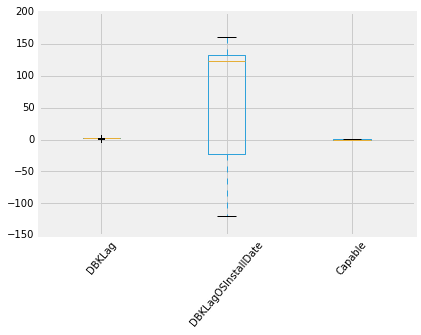

In [63]:
# Review the box plot of the resulting dataframe
#
dfL.boxplot(figsize=(1150,1150), rot=50 , return_type='axes');

## Predictive Analytics

In [53]:
# Lets convert the columns to numeric 
# Please see Prepare in Features.py 

df =  prepareDF(dfL, makeCopy=True)

# After you run this, this will remove ProcessDateId column since it seems like a key column
# Review the resulting final data set;
display(dfL.head(), "==>" ,df.head() )

# shuffle the rows so that it won't cause hidden problems in case
df = df.sample(frac=1).reset_index(drop=True)


Dropping in prepareDF -  Index(['ProcessedDateId', 'Capable_FirstSeen'], dtype='object')


,ProcessedDateId,OEMModel,OSVersionToStr,LastUpdatedDate,OSInstallDate,Capable_FirstSeen,DBKLag,DBKLagOSInstallDate,Capable
0,20151007,Surface Pro 4,10240.16520.150916.2039,2015-10-07 05:19:52,2015-10-06,nan,2.358,142.673,0
1,20160225,Surface Pro 4,10240.16683.160104.1507,2016-02-25 14:53:54,2015-10-08,2015-10-24 23:00:00,2.061,16.958,1
2,20151027,Surface Pro 4,10240.16498.150819.1946,2015-10-27 21:39:55,2015-10-26,nan,2.013,122.673,0
3,20151026,Surface Pro 4,10240.16498.150819.1946,2015-10-26 19:15:07,2015-10-26,nan,2.031,122.673,0
4,20151021,Surface Book,10240.16498.150819.1946,2015-10-21 04:53:55,2015-10-20,nan,2.124,128.673,0


'==>'

,OEMModel,OSVersionToStr,LastUpdatedDate,OSInstallDate,DBKLag,DBKLagOSInstallDate,Capable
0,1,2,20151007051952,20151006000000,2.358,142.673,0
1,1,8,20160225145354,20151008000000,2.061,16.958,1
2,1,1,20151027213955,20151026000000,2.013,122.673,0
3,1,1,20151026191507,20151026000000,2.031,122.673,0
4,0,1,20151021045355,20151020000000,2.124,128.673,0


In [10]:
%%time
%run "../common.ipynb"
cls = [# Comment/uncomment out any classfiers according to your need 
       # DO NOT CHANGE
        "DecisionTree Gini" , tree.DecisionTreeClassifier(max_depth=4, criterion="gini"),
        "DecisionTree Entr" , tree.DecisionTreeClassifier(max_depth=4, criterion="entropy"), 
        #"SVM"               , sklearn.svm.SVC(), 
        #"Random Forest"     , sklearn.ensemble.RandomForestClassifier(),
        "K-NN"              , sklearn.neighbors.KNeighborsClassifier(),
        "Gradient Boosting" , sklearn.ensemble.RandomForestClassifier(),
        "Logit Regression"  , sklearn.linear_model.LogisticRegression()
];

y = df[predictColumn]
X = df.drop(predictColumn, axis=1)
(X1,y1,ra,cls) = Classify(X,y, drawConfusionMatrix=False, classifiers=cls, scale=False, printDebug=False)

Feature space holds 248 observations and 6 features
Unique target labels: [0 1]
Wall time: 87.6 ms


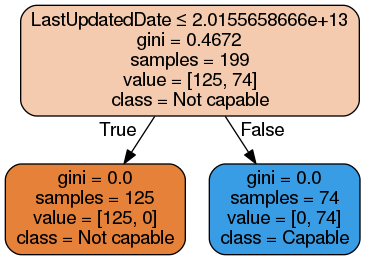

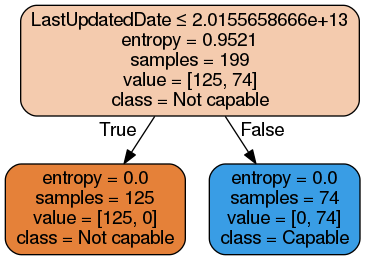

In [12]:
%run "../common.ipynb"
decisionTrees = []

for k in range( int(len(cls)/2)):
    d = cls[k*2+1];
    if (str(type(d)).find('DecisionTreeClassifier') > 0):
        decisionTrees.append(cls[k*2])
        decisionTrees.append(cls[k*2+1])

d = DrawDecisionTree(X,y, decisionTrees, class_names);


*********** 0 : Most Significant Column is:  LastUpdatedDate
Feature space holds 248 observations and 5 features
Unique target labels: [0 1]
* 0* 1* 2* 3* 4*
   DecisionTree Gini accuracy: 1.000000 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       153
          1       1.00      1.00      1.00        95

avg / total       1.00      1.00      1.00       248


* 0* 1* 2* 3* 4*
   DecisionTree Entr accuracy: 1.000000 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       153
          1       1.00      1.00      1.00        95

avg / total       1.00      1.00      1.00       248




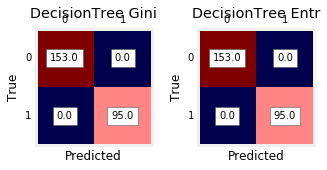

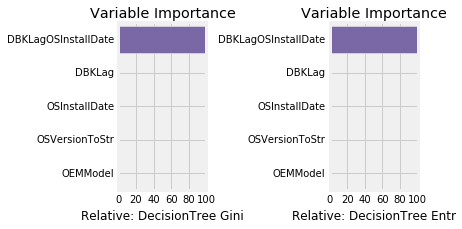

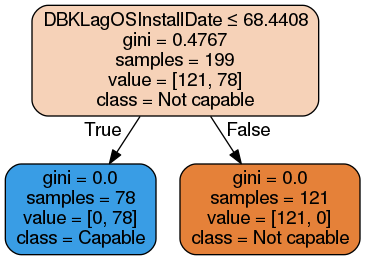

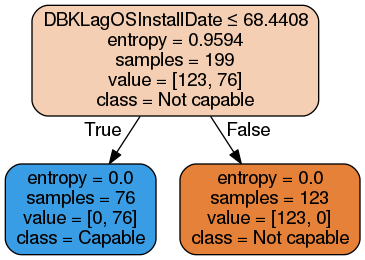

*********** 1 : Most Significant Column is:  DBKLagOSInstallDate
Feature space holds 248 observations and 4 features
Unique target labels: [0 1]
* 0* 1* 2* 3* 4*
   DecisionTree Gini accuracy: 0.939516 
             precision    recall  f1-score   support

          0       0.94      0.97      0.95       153
          1       0.94      0.89      0.92        95

avg / total       0.94      0.94      0.94       248


* 0* 1* 2* 3* 4*
   DecisionTree Entr accuracy: 0.959677 
             precision    recall  f1-score   support

          0       0.97      0.97      0.97       153
          1       0.95      0.95      0.95        95

avg / total       0.96      0.96      0.96       248




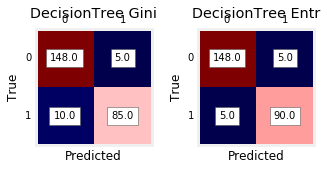

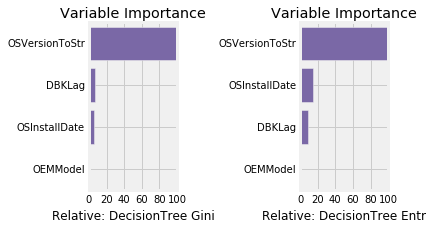

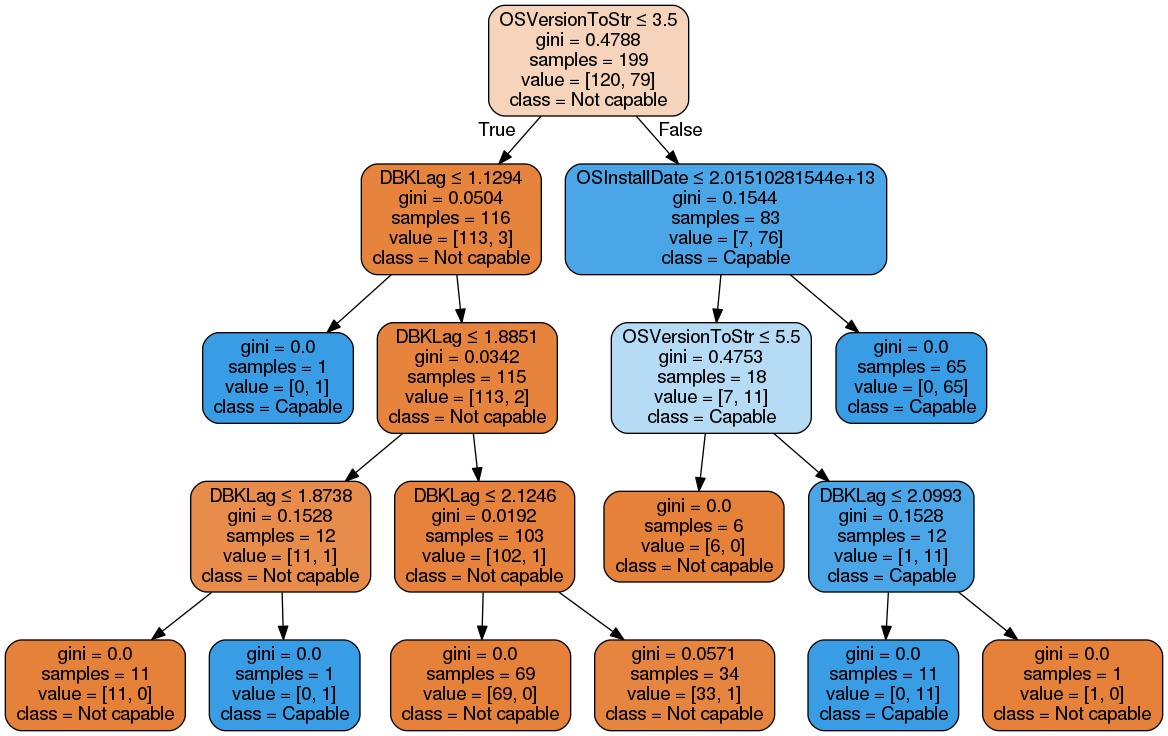

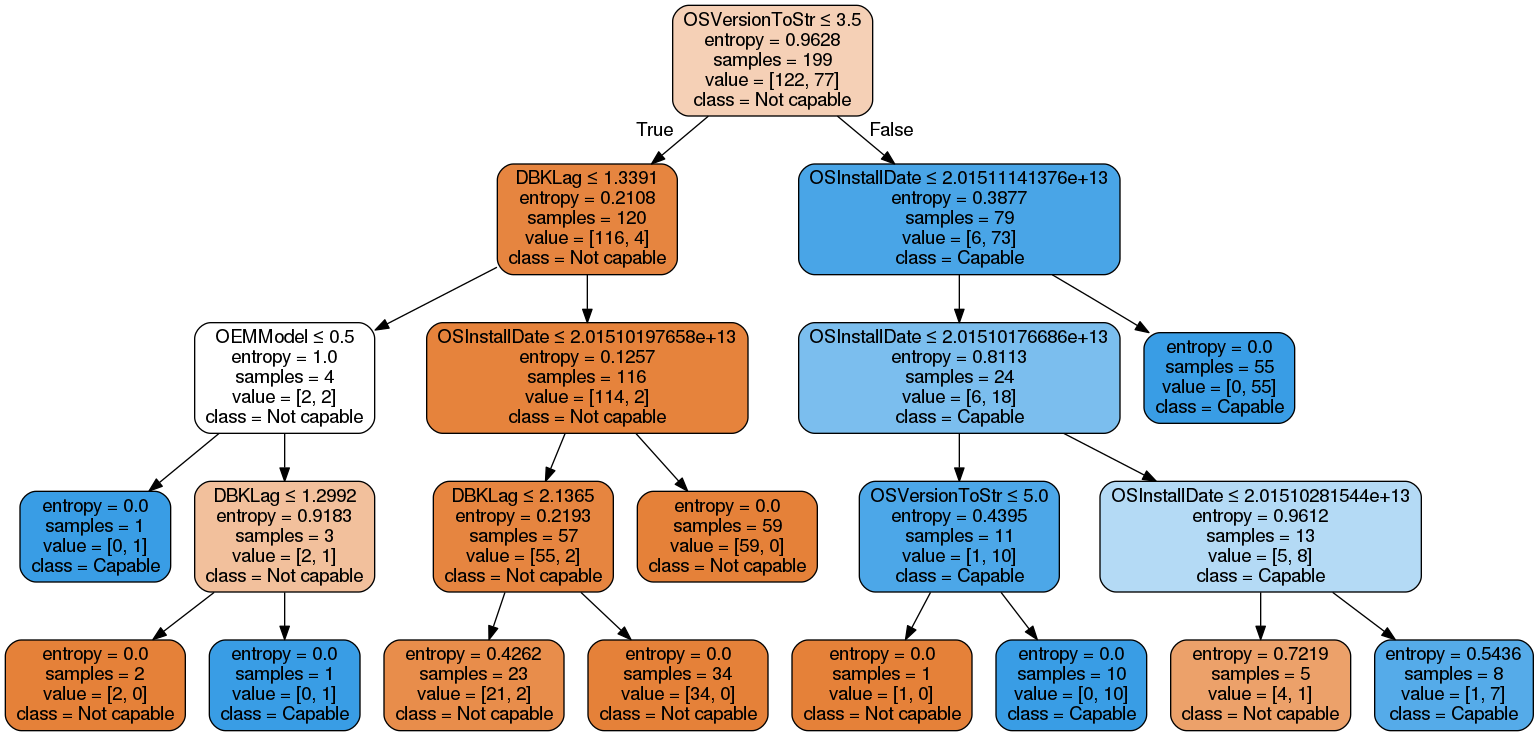

*********** 2 : Most Significant Column is:  OSVersionToStr
Feature space holds 248 observations and 3 features
Unique target labels: [0 1]
* 0* 1* 2* 3* 4*
   DecisionTree Gini accuracy: 0.931452 
             precision    recall  f1-score   support

          0       0.92      0.97      0.95       153
          1       0.95      0.86      0.91        95

avg / total       0.93      0.93      0.93       248


* 0* 1* 2* 3* 4*
   DecisionTree Entr accuracy: 0.919355 
             precision    recall  f1-score   support

          0       0.89      0.99      0.94       153
          1       0.97      0.81      0.89        95

avg / total       0.92      0.92      0.92       248




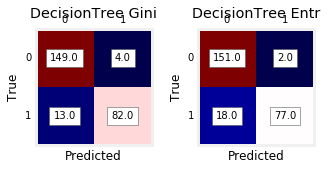

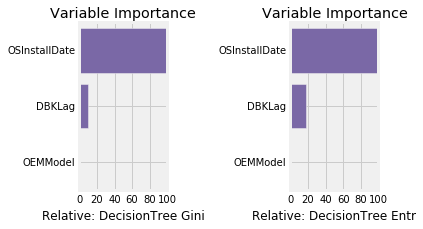

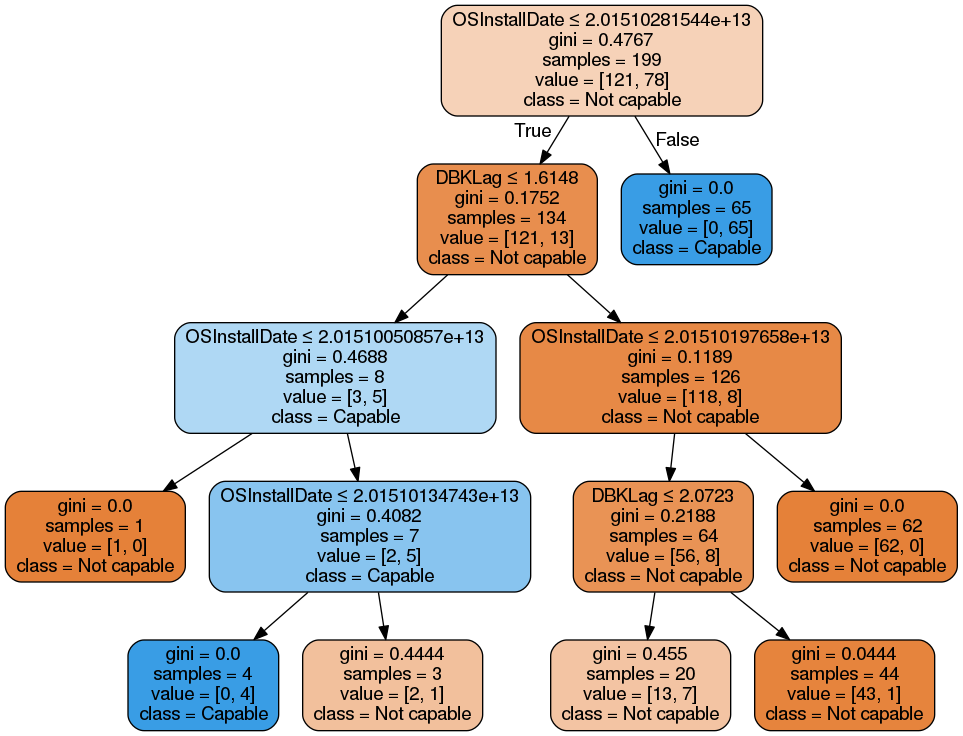

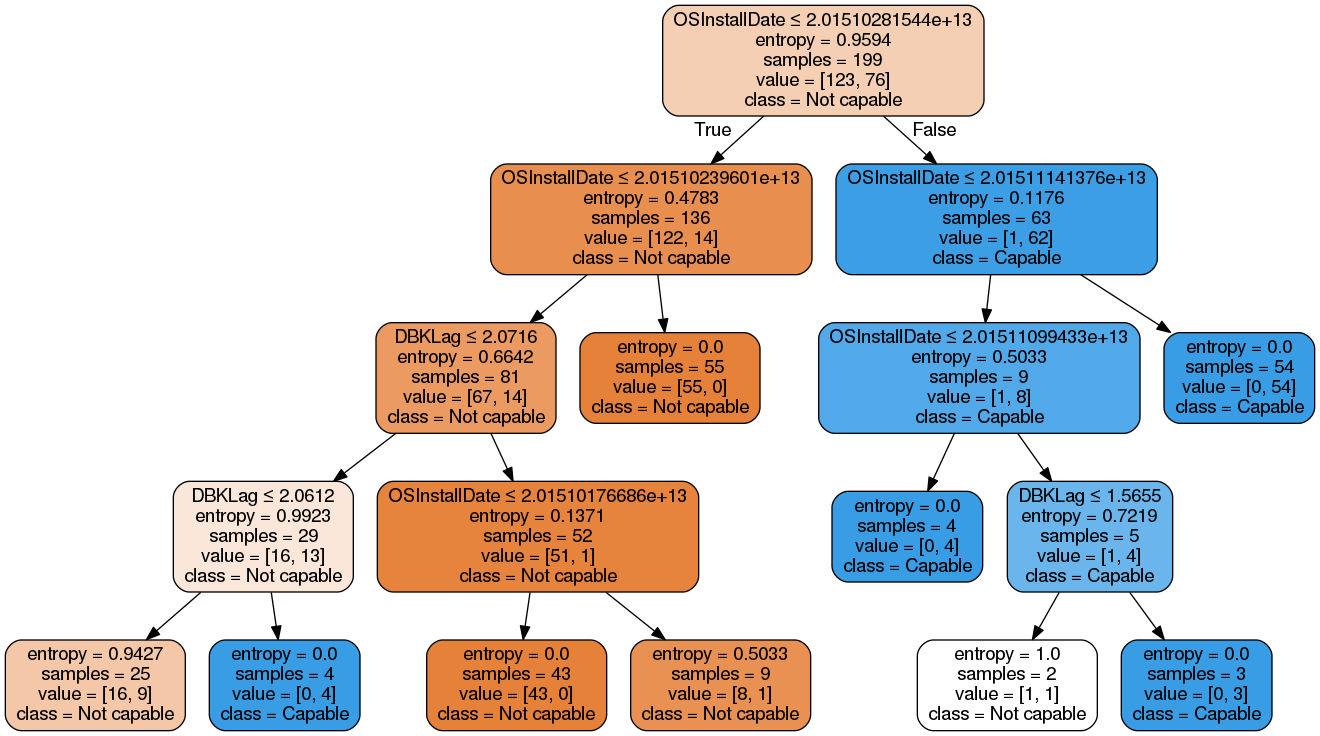

*********** 3 : Most Significant Column is:  OSInstallDate
Feature space holds 248 observations and 2 features
Unique target labels: [0 1]
* 0* 1* 2* 3* 4*
   DecisionTree Gini accuracy: 0.866935 
             precision    recall  f1-score   support

          0       0.88      0.92      0.89       153
          1       0.85      0.79      0.82        95

avg / total       0.87      0.87      0.87       248


* 0* 1* 2* 3* 4*
   DecisionTree Entr accuracy: 0.842742 
             precision    recall  f1-score   support

          0       0.87      0.88      0.87       153
          1       0.80      0.78      0.79        95

avg / total       0.84      0.84      0.84       248




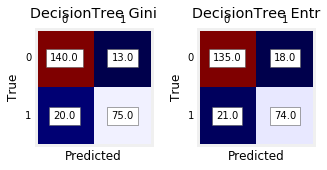

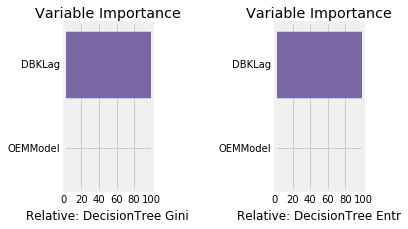

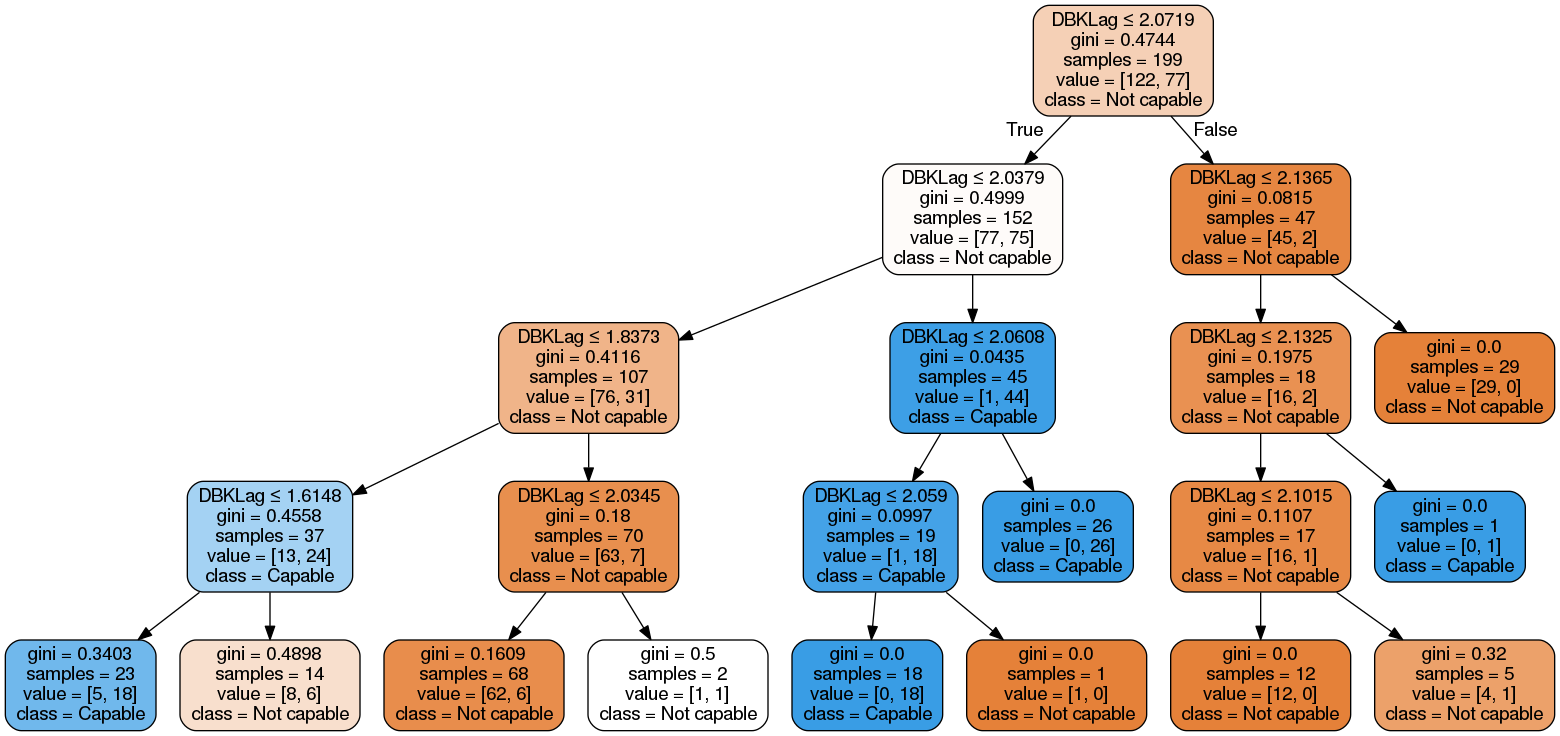

In [ ]:
%run "../common.ipynb"
# Lets run the decision tree by removing the most significant feature to see 
#  which other features bubbles up in the significance list

for i in range(min(5, len(X.columns)-1) ) :
    mostSignificant=np.argsort(decisionTrees[1].feature_importances_)[-1]
    c = X.columns[mostSignificant]
    print ("***********", i, ": Most Significant Column is: ", c)
    #HTML("<h2> Dropping column and running next </h2><hr>")
    X = X.drop(c, axis=1)
    (X1,y1,ra,cls) = Classify(X,y, True, drawConfusionMatrix=True, classifiers=decisionTrees, scale=False)
    DrawDecisionTree(X,y, cls, class_names)

## Results

> Present conclusions Here